HEART DISEASE CLASSIFICATION

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This dataset contains:

age - age in years

sex - 1=male, 0=female

cp - chest pain type

trestbps - resting blood pressure

chol - cholestrol level

fbs - fasting blood sugar

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels

thal - defect type

target - have disease or not

In [20]:
pd.isnull(df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
a=pd.get_dummies(df['cp'],prefix='cp')
b=pd.get_dummies(df['thal'],prefix='thal')
c=pd.get_dummies(df['slope'],prefix='slope')
df = pd.concat([df,a,b,c],axis=1)

In [22]:
df = df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [23]:
y = df['target'].values
x_data = df.drop(['target'], axis=1)

In [24]:
x = (x_data - np.min(x_data))/(np.max(x_data) + np.min(x_data))

In [25]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size = 0.2, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]
acc = model.score(xtest,ytest)*100
print(acc)

86.88524590163934


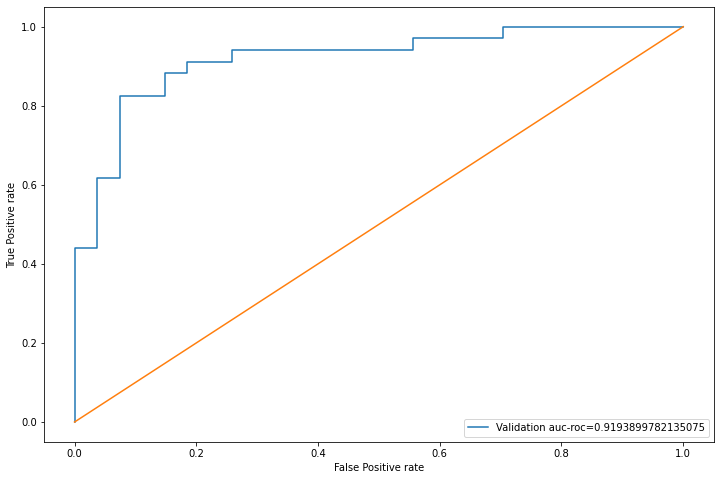

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,_ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)   
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation auc-roc="+str(auc))   
x_axis = np.linspace(0,1,1000)
plt.plot(x_axis,x_axis,linestyle='-')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)
plt.show()

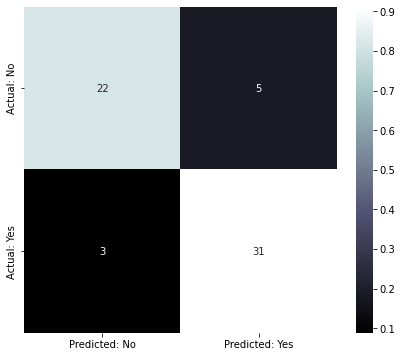

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_val = model.predict(xtest) 
label_preds = pred_val
cm = confusion_matrix(ytest,label_preds)
def plot_cm(cm, normalized=True, cmap='bone'):
  plt.figure(figsize=[7,6])
  norm_cm = cm
  if normalized:
    norm_cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    sns.heatmap(norm_cm,annot=cm,fmt='g',xticklabels=['Predicted: No','Predicted: Yes'],yticklabels=['Actual: No','Actual: Yes'],cmap=cmap)
plot_cm(cm,['No','Yes'])
